<a href="https://colab.research.google.com/github/JavaFXpert/qiskit4devs-workshop-notebooks/blob/master/grover_search_party.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Using Grover search for boolean satisfiability
### *Throwing a party while avoiding the drama*

Imagine you are inviting some friends to a party, some who are couples, and some who are not on speaking terms. Specifically, Alice and Bob are in a relationship, as are Carol and David. However, Alice and David had a bad breakup a while ago and haven't been civil with each other since. Armed with a quantum computer and Qiskit Aqua, how can you leverage Grover search algorithm to identify friendly combinations of people to invite?

Fortunately, Grover search may be used for [boolean satisfiability problems](https://en.wikipedia.org/wiki/Boolean_satisfiability_problem), and the constraints for our party planning problem may be formulated with the following boolean expression:

`((A and B) or (C and D)) and not (A and D)`

Consulting a site such as [Wolfram Alpha](https://www.wolframalpha.com/examples/mathematics/logic-and-set-theory/) reveals that our expression equates to the following formula in [conjunctive normal form](https://en.wikipedia.org/wiki/Conjunctive_normal_form), or CNF:

`((not A) or B) and ((not A) or (not D)) and (A or C) and (A or D)`

>**Note**: In a future version of Aqua, the Grover oracle may also likely be articulated as a boolean expression, eliminating the need for converting to CNF.

To use the CNF expression in Aqua, we'll encode it as follows:

```
c Party invitation constraints
p cnf 4 4
-1 2 0
-1 -4 0
1 3 0
1 4 0
```

The first line is a comment, denoted by the `c`. The second line indicates that there are four variables (A, B, C, D are represented by 1, 2, 3, 4), and four clauses. The remaining lines contain the clauses, each terminated by a `0`, with the minus sign indicating a logical `not`. Variables in each clause have an implicit `or` between them, and clauses have an implicit `and` between them.

Let's go ahead and use our CNF expression in a Grover search to find out compatible combinations of people to invite.



In [1]:
# Do the necessary import for our program
!pip install qiskit-aqua
from qiskit import BasicAer
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle
from qiskit.tools.visualization import plot_histogram


     |████████████████████████████████| 409kB 1.8MB/s 
     |████████████████████████████████| 481kB 42.4MB/s 
     |████████████████████████████████| 501kB 37.2MB/s 
     |████████████████████████████████| 81kB 15.2MB/s 
     |████████████████████████████████| 1.5MB 38.1MB/s 
     |████████████████████████████████| 5.3MB 37.8MB/s 
     |████████████████████████████████| 61kB 20.1MB/s 
     |████████████████████████████████| 61kB 23.0MB/s 
     |████████████████████████████████| 51kB 17.8MB/s 
     |████████████████████████████████| 51kB 19.3MB/s 
     |████████████████████████████████| 51kB 18.5MB/s 
     |████████████████████████████████| 2.3MB 28.4MB/s 
     |████████████████████████████████| 102kB 27.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/8e/33/76/efb4411454eb542ca9737cdd60418ec23f3625809738d17871
  Stored in directory: /root/.cache/pip/wheels/87/a0/8b/d628240de84941fbc744b270701a75d16c2368e1f341264965
  Stored in directory: /root/.cache/pip/wheels/bb/ba/15/fdd0deb10

In [0]:
# Construct the oracle and Grover algorithm instance
sat_cnf = """
c Party invitation constraints
p cnf 4 4
-1 2 0
-1 -4 0
1 3 0
1 4 0
"""

sat_oracle = LogicalExpressionOracle(sat_cnf)

algorithm = Grover(sat_oracle)


Now we'll run the algorithm on a simulator, printing the result that occurred most often. This result is expressed as the numeric representations of our four friends; a minus sign indicating which ones Grover advised against inviting in that particular result.

In [16]:
# Run the algorithm on a simulator, printing the most frequently occurring result
backend = BasicAer.get_backend('qasm_simulator')

result = algorithm.run(backend)
print(result['result'])
print(result['top_measurement'])

[-1, -2, 3, 4]
1100


Finally, we'll plot the results. Each basis state represents our four friends, with the least significant bit representing Alice. If a bit is 1, then the advice is to invite the person that the bit represents. If the bit is 0, then Grover advises not to send an invitation.

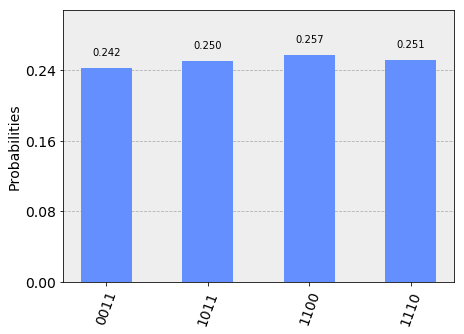

In [17]:
plot_histogram(result['measurement'])

#### Now it's you're turn to play!

Create and implement your own scenario that can be modeled as a boolean satisfiability problem using Grover search. Have fun with it, and carry on with your quantum computing journey!